In [3]:
import neuro_lib    # Импорт своей библиотеки для работы с Neuro обработкой файлов

file = [r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\0-2020-11_27_15-19-11.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\1-2020-11_28_03-21-26.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\2-2020-11_28_15-24-13.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\3-2020-11_29_03-27-50.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\4-2020-11_29_15-31-26.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\5-2020-11_30_03-34-57.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\6-2020-11_30_15-38-28.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\7-2020-12_01_03-42-06.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\8-2020-12_01_15-45-42.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\9-2020-12_02_03-49-15.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\10-2020-12_02_15-54-28.txt",
        r"C:\Users\alexc\Desktop\Data_boss\Data_ZnO_1\11-2020-12_03_04-04-42.txt"]


param_str = [3.3, 68000] # Параметры структуры: V(В) пит., R(Ом) доп.

[neuro_lib.replace(i) for i in file]
[neuro_lib.replace(j, '         ', '\t') for j in file]
print (param_str)

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\alexc\\Desktop\\Data_boss\\Data_ZnO_1\\0-2020-11_27_15-19-11.txt'

In [20]:
import neuro_lib_2
i = 0
res_on_off = [neuro_lib_2.on_off_impulse(i) for i in file]
for j in range(0,3):
    print (res_on_off[j].head().to_string())

   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN     10.01   0.28575
1  1     10.528   0.349875    11.52    0.5315      11.545    0.503375    11.742  0.477875
2  2     11.775   0.520125   12.774     0.619      12.796      0.5985    12.991  0.562875
3  3     13.025   0.607375   14.014   0.68425      14.038    0.658875    14.235   0.62875
4  4     14.268     0.6735   15.268  0.741375       15.29     0.71725    15.486  0.684625
   N on_start_t on_start_V on_end_t  on_end_V off_start_t off_start_V off_end_t off_end_V
0  0        NaN        NaN      NaN       NaN         NaN         NaN    10.011  0.348125
1  1     10.527   0.391125   11.527     0.615      11.547      0.5885    12.054  0.547875
2  2     12.086     0.5925   13.082  0.701125      13.103      0.6745    13.605     0.633
3  3     13.635     0.6745    14.63  0.766625      14.651    0.739375    15.156     0.698
4  4     1

In [62]:
import pandas as pd
import numpy as np
data = [pd.read_csv(i, header=None, sep = "\t") for i in file]
#data_V[1][2] = pd.Series()
#data_V[1][2] = pd.Series(0, index=data_V[1].index)         # можно по индекса менять значения
# for i in range(0, len(data)):
#     data[i][2] = 1/((param_str[0] - data[i][1])*param_str[1]/data[i][1]) # не хватает разрядности для преобразования в S
for j in range(0,3):
    print (data[j].head().to_string())
print (len(data))

      0         1
0     5  0.285125
1   505  0.286000
2  1005  0.286125
3  1506  0.285500
4  2006  0.285625
      0         1
0     6  0.348125
1   506  0.348375
2  1006  0.348750
3  1506  0.348250
4  2006  0.348500
      0         1
0     5  0.371875
1   505  0.371875
2  1005  0.372000
3  1505  0.371875
4  2006  0.370875
12


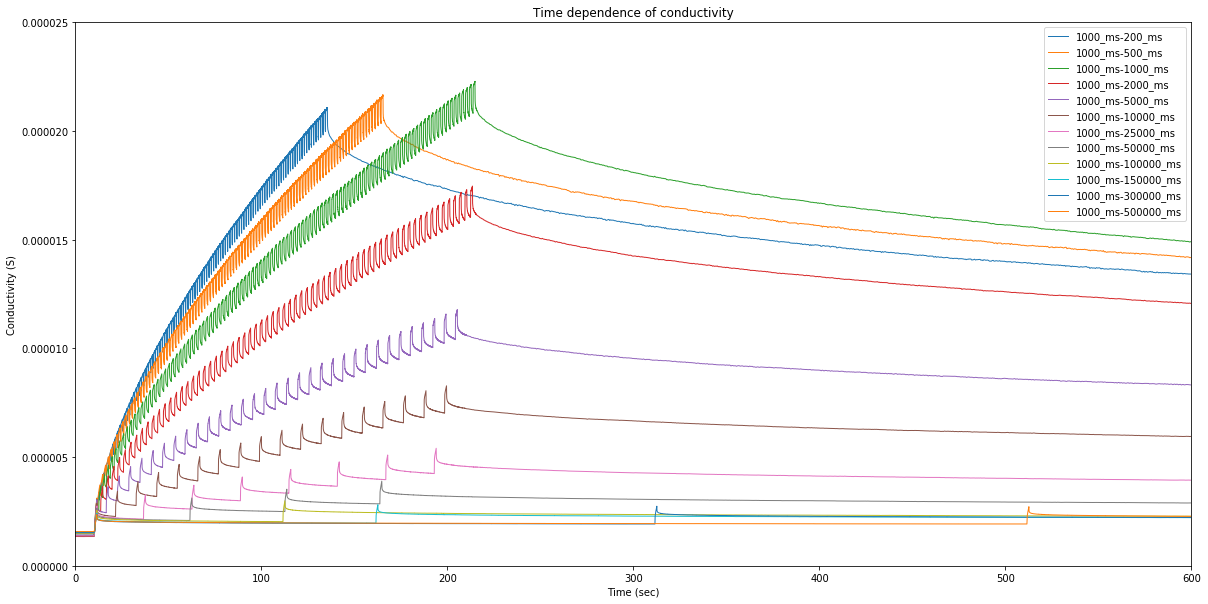

In [210]:
import matplotlib.pyplot as plt

x = list(data[0][0])
y = list(data[0][1])

popravka = [0,
            -0.00000025,
            -0.0000005,
            -0.0000005,
            -0.0000004,
            -0.0000002,
            0.00000002,
            0.0000004,
            0.00000067,
            0.0000009,
            0.000001,
            0.0000011]

for i in range(0, len(data)):
    x[i] = list(data[i][0]/1000)
    y[i] = 1/((param_str[0] - data[i][1])*param_str[1]/data[i][1]) + popravka[i]

My_lable = ['1000_ms-200_ms',
            '1000_ms-500_ms',
            '1000_ms-1000_ms',
            '1000_ms-2000_ms',
            '1000_ms-5000_ms',
            '1000_ms-10000_ms',
            '1000_ms-25000_ms',
            '1000_ms-50000_ms',
            '1000_ms-100000_ms',
            '1000_ms-150000_ms',
            '1000_ms-300000_ms',
            '1000_ms-500000_ms'] 

plt.rcParams['figure.figsize'] = (20, 10)  # Размер картинок
plt.title("Time dependence of conductivity")
for i in range(0, len(data)):
    plt.plot(x[i], y[i] , linewidth = 1, label = My_lable[i])
plt.legend()
plt.xlabel("Time (sec)")
plt.ylabel("Conductivity (S)")
plt.axis([0, 600, 0, 0.000025])

plt.show()

[1.2026384757656663, 1.1960766817759005, 1.2049518817581681, 1.2022227789514928, 1.1986802653156072, 1.195730517957469, 1.1887494743327143, 1.1798376952113985, 1.1719448593893163, 1.1652963300462689, 1.1562495396818544, 1.1528773666430883]


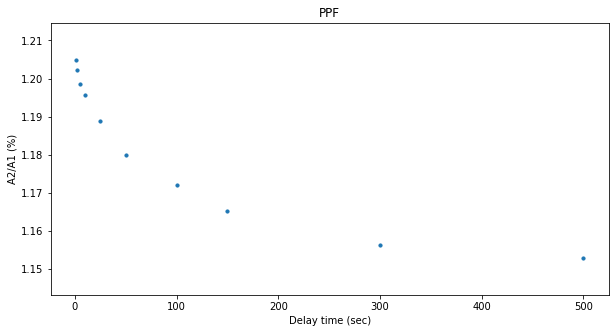

In [311]:
delay_time = [0.2, 0.5, 1, 2, 5, 10, 25, 50, 100, 150, 300, 500]

popravka = [0,
            -0.00000025,
            -0.0000005,
            -0.0000005,
            -0.0000004,
            -0.0000002,
            0.00000002,
            0.0000004,
            0.00000067,
            0.0000009,
            0.000001,
            0.0000011]

PPF = list()

pop_PPF = [0.0,0.004,-0.00,0.0025,0.002,0,0,0,-0.001,0.002,-0.004,0]
for i in range (0, len(data)):
     #PPF.append((res_on_off[i]['on_end_V'][2])/(res_on_off[i]['on_end_V'][1]))
        S1 = 1/((param_str[0] - res_on_off[i]['on_end_V'][1])*param_str[1]/res_on_off[i]['on_end_V'][1]) + popravka[i]
        S2 = 1/((param_str[0] - res_on_off[i]['on_end_V'][2])*param_str[1]/res_on_off[i]['on_end_V'][2]) + popravka[i]
        PPF.append(S2/S1 + pop_PPF[i])
print (PPF)

plt.rcParams['figure.figsize'] = (10, 5)  # Размер картинок
plt.title("PPF")
plt.plot()
plt.scatter(delay_time[2:12], PPF[2:12], s = 10)
#plt.plot(delay_time[2:12], PPF[2:12])
plt.xlabel("Delay time (sec)")
plt.ylabel("A2/A1 (%)")
#plt.axis([-5, 520, 1.15, 1.215])

plt.show()